In [ ]:
# =====================================
# Objetivo: Comparar pilotos o equipos
# =====================================

# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("C:\\Users\\Angel\\OneDrive\\Documents\\SansumgProjects\\Proyecto1\\Data\\f1_clean_Dataset.csv")

# Mostrar estructura general
df.head()


,resultId,raceId,driverId,constructorId,number_x,grid,position,points,laps,time,...,dob,nationality,url,year,race_name,round,circuitId,date,team_name,driver_fullname
0,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,Australian Grand Prix,1,1,2008-03-16,McLaren,Lewis Hamilton
1,2,18,2,2,3,5,2,8.0,58,+5.478,...,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,Australian Grand Prix,1,1,2008-03-16,BMW Sauber,Nick Heidfeld
2,3,18,3,3,7,7,3,6.0,58,+8.163,...,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,Australian Grand Prix,1,1,2008-03-16,Williams,Nico Rosberg
3,4,18,4,4,5,11,4,5.0,58,+17.181,...,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,Australian Grand Prix,1,1,2008-03-16,Renault,Fernando Alonso
4,5,18,5,1,23,3,5,4.0,58,+18.014,...,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,Australian Grand Prix,1,1,2008-03-16,McLaren,Heikki Kovalainen


,driver,points,average_position,laps_completed
0,Lewis Hamilton,385.5,2.761905,1269
1,Max Verstappen,388.5,1.842105,1211


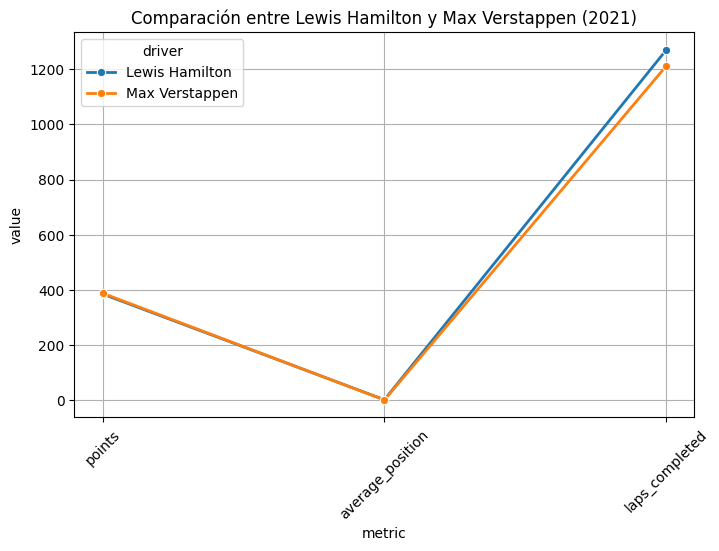

In [25]:
def comparar_pilotos_lineas(piloto1, piloto2, temporada):
    datos = df[df["year"] == temporada].copy()
    datos["driver_fullname_lower"] = datos["driver_fullname"].str.lower()
    
    p1 = datos[datos["driver_fullname_lower"] == piloto1.lower()]
    p2 = datos[datos["driver_fullname_lower"] == piloto2.lower()]
    
    resumen = pd.DataFrame({
        "driver": [piloto1, piloto2],
        "points": [p1["points"].sum(), p2["points"].sum()],
        "average_position": [pd.to_numeric(p1["position"], errors="coerce").mean(),
                             pd.to_numeric(p2["position"], errors="coerce").mean()],
        "laps_completed": [pd.to_numeric(p1["laps"], errors="coerce").sum(),
                           pd.to_numeric(p2["laps"], errors="coerce").sum()]
    })
    
    display(resumen)
    
    resumen_melted = resumen.melt(id_vars="driver", var_name="metric", value_name="value")
    
    plt.figure(figsize=(8,5))
    sns.lineplot(data=resumen_melted, x="metric", y="value", hue="driver", marker="o", linewidth=2)
    plt.title(f"Comparación entre {piloto1} y {piloto2} ({temporada})")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Ejemplo de uso
comparar_pilotos_lineas("Lewis Hamilton", "Max Verstappen", 2021)


,team_name,points,average_position,laps_completed
0,Mercedes,604.5,3.794872,2403
1,Red Bull,578.5,4.282051,2397


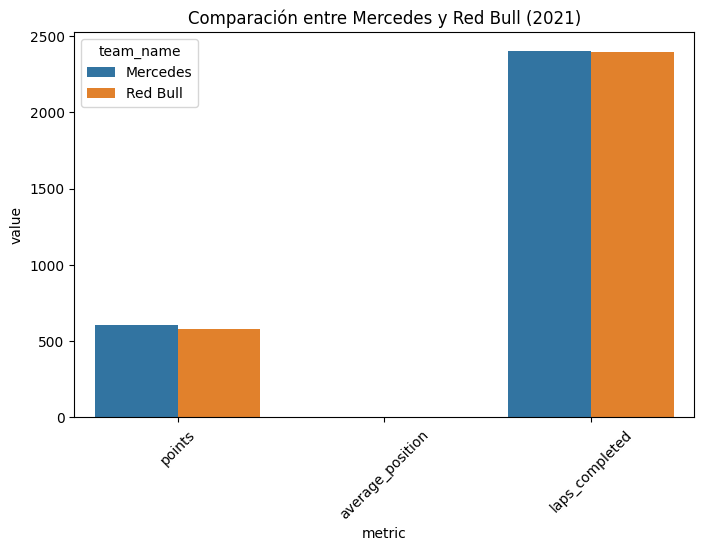

In [27]:
def comparar_equipos(equipo1, equipo2, temporada):
    datos = df[df["year"] == temporada].copy()
    datos["team_name_lower"] = datos["team_name"].str.lower()
    
    e1 = datos[datos["team_name_lower"] == equipo1.lower()]
    e2 = datos[datos["team_name_lower"] == equipo2.lower()]
    
    e1_points = e1["points"].sum()
    e2_points = e2["points"].sum()
    
    e1_avg_pos = pd.to_numeric(e1["position"], errors="coerce").mean()
    e2_avg_pos = pd.to_numeric(e2["position"], errors="coerce").mean()
    
    e1_laps = pd.to_numeric(e1["laps"], errors="coerce").sum()
    e2_laps = pd.to_numeric(e2["laps"], errors="coerce").sum()
    
    resumen = pd.DataFrame({
        "team_name": [equipo1, equipo2],
        "points": [e1_points, e2_points],
        "average_position": [e1_avg_pos, e2_avg_pos],
        "laps_completed": [e1_laps, e2_laps],
    })
    
    display(resumen)
    
    resumen_melted = resumen.melt(id_vars="team_name", var_name="metric", value_name="value")
    plt.figure(figsize=(8,5))
    sns.barplot(data=resumen_melted, x="metric", y="value", hue="team_name")
    plt.title(f"Comparación entre {equipo1} y {equipo2} ({temporada})")
    plt.xticks(rotation=45)
    plt.show()

# Prueba de la función
comparar_equipos("Mercedes", "Red Bull", 2021)
